In [2]:
import numpy as np
import time
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
ch_names = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 
            'F8', 'T3', 'T4', 'T5', 'T6', 'A1', 'A2', 'FZ', 'CZ', 'PZ']

BAND_LIMITS = np.array([[ 0,  2, 'delta'],
       [ 1,  3, 'delta'],
       [ 2,  4, 'delta'],
       [ 3,  6, 'theta'],
       [ 4,  8, 'theta'],
       [ 6, 10, 'alfa'],
       [ 8, 13, 'alfa'],
       [10, 15, 'beta'],
       [13, 18, 'beta'],
       [15, 21, 'beta'],
       [18, 24, 'beta'],
       [21, 27, 'beta'],
       [24, 30, 'gamma'],
       [27, 39, 'gamma'],
       [30, 49, 'gamma']])

In [12]:
X_train = pd.read_csv('data/X_train.csv')
#X_train = X_train / X_train.to_numpy().std(axis=1, keepdims=True)
Y_train = np.load('data/Y_train.npy')
X_eval = pd.read_csv('data/X_eval.csv')
#X_eval = X_eval / X_eval.to_numpy().std(axis=1, keepdims=True)
Y_eval = np.load('data/Y_eval.npy')
Y_eval_all = np.load('data/Y_eval_all.npy', allow_pickle=True)
cols = np.array(X_eval.columns)

In [14]:
np.min(np.array(X_train)), np.min(np.array(X_eval))

(3.810260473458704e-05, 7.626851641672494e-05)

In [14]:
clf_eval = SVC(kernel="rbf", C=10, probability=True, gamma="auto")
clf_eval.fit(X_train, Y_train)
preds = clf_eval.predict(X_eval)
acc_ri = accuracy_score(Y_eval, preds)
acc_ri

0.8079710144927537

In [16]:
n_pert = 10
n_feat = len(cols)
l = 0
T = np.zeros((n_feat, n_pert))
for idx_f, f in enumerate(cols):
    for idx_p in range(n_pert):
        t0 = time.time()
        df = X_eval.copy()
        df[f] = np.random.choice(df[f], len(df[f]))
        preds2 = clf_eval.predict(df)
        T[idx_f, idx_p] = acc_ri / accuracy_score(Y_eval, preds2)
        l += 1
        print(f"{l} z {n_feat*n_pert}, {(time.time() - t0) / 60}")
    
np.save('results/ri_trad_perm.npy', T)

1 z 3150, 0.0025558312733968097
2 z 3150, 0.0023450334866841633
3 z 3150, 0.002343110243479411
4 z 3150, 0.0023416956265767414
5 z 3150, 0.0023250699043273924
6 z 3150, 0.0023133198420206705
7 z 3150, 0.0023391286532084147
8 z 3150, 0.0023398796717325845
9 z 3150, 0.0023386557896931965
10 z 3150, 0.002339812119801839
11 z 3150, 0.0023304343223571776
12 z 3150, 0.002341667811075846
13 z 3150, 0.002338707447052002
14 z 3150, 0.0023386279741923013
15 z 3150, 0.002338552474975586
16 z 3150, 0.0023305694262186686
17 z 3150, 0.0023409128189086914
18 z 3150, 0.002341767152150472
19 z 3150, 0.0023392836252848306
20 z 3150, 0.0023402889569600423
21 z 3150, 0.0023253122965494794
22 z 3150, 0.002340245246887207
23 z 3150, 0.002339176336924235
24 z 3150, 0.0023398677508036296
25 z 3150, 0.0023396968841552734
26 z 3150, 0.00232543150583903
27 z 3150, 0.0023388067881266275
28 z 3150, 0.0023398598035176596
29 z 3150, 0.0023389856020609536
30 z 3150, 0.0023400227228800455
31 z 3150, 0.0023339470227559

249 z 3150, 0.002321493625640869
250 z 3150, 0.002340332667032878
251 z 3150, 0.002340416113535563
252 z 3150, 0.0023392041524251304
253 z 3150, 0.002339347203572591
254 z 3150, 0.002320992946624756
255 z 3150, 0.0023370663324991862
256 z 3150, 0.0023525714874267577
257 z 3150, 0.002353183428446452
258 z 3150, 0.0023477713267008463
259 z 3150, 0.0023267388343811033
260 z 3150, 0.0023420174916585286
261 z 3150, 0.002339184284210205
262 z 3150, 0.0023385087649027505
263 z 3150, 0.0023389498392740885
264 z 3150, 0.0023224870363871258
265 z 3150, 0.0023382862408955893
266 z 3150, 0.0023391326268513996
267 z 3150, 0.0023386081059773764
268 z 3150, 0.002340543270111084
269 z 3150, 0.0023378451665242513
270 z 3150, 0.0023413856824239096
271 z 3150, 0.0023398637771606446
272 z 3150, 0.002342236042022705
273 z 3150, 0.0023409048716227215
274 z 3150, 0.0023359417915344237
275 z 3150, 0.002330966790517171
276 z 3150, 0.002340511480967204
277 z 3150, 0.0023387273152669272
278 z 3150, 0.00233927170

495 z 3150, 0.002339486281077067
496 z 3150, 0.002341763178507487
497 z 3150, 0.002339343229929606
498 z 3150, 0.0023253957430521646
499 z 3150, 0.002337229251861572
500 z 3150, 0.0023406585057576495
501 z 3150, 0.002341739336649577
502 z 3150, 0.0023404836654663088
503 z 3150, 0.0023202816645304363
504 z 3150, 0.0023411273956298827
505 z 3150, 0.0023383498191833496
506 z 3150, 0.0023410717646280923
507 z 3150, 0.0023390849431355796
508 z 3150, 0.0023238261540730796
509 z 3150, 0.002339323361714681
510 z 3150, 0.0023410956064860025
511 z 3150, 0.002338731288909912
512 z 3150, 0.002338155110677083
513 z 3150, 0.002324414253234863
514 z 3150, 0.002340849240620931
515 z 3150, 0.0023399988810221353
516 z 3150, 0.0023399551709493
517 z 3150, 0.0023387749989827473
518 z 3150, 0.0023292779922485353
519 z 3150, 0.002338747183481852
520 z 3150, 0.00234147310256958
521 z 3150, 0.0023383140563964845
522 z 3150, 0.0023404518763224286
523 z 3150, 0.002318731943766276
524 z 3150, 0.00233888228734334

741 z 3150, 0.0023379166920979816
742 z 3150, 0.002322224775950114
743 z 3150, 0.0023426532745361326
744 z 3150, 0.0023447910944620768
745 z 3150, 0.00234448512395223
746 z 3150, 0.0023457646369934083
747 z 3150, 0.0023364623387654624
748 z 3150, 0.002343328793843587
749 z 3150, 0.0023451805114746093
750 z 3150, 0.0023444334665934244
751 z 3150, 0.0023439606030782063
752 z 3150, 0.002338588237762451
753 z 3150, 0.002345601717631022
754 z 3150, 0.002346662680308024
755 z 3150, 0.00234525203704834
756 z 3150, 0.002347445487976074
757 z 3150, 0.0023044705390930175
758 z 3150, 0.0023436745007832846
759 z 3150, 0.002340368429819743
760 z 3150, 0.0023421208063761395
761 z 3150, 0.002339661121368408
762 z 3150, 0.002319363753000895
763 z 3150, 0.0023386160532633464
764 z 3150, 0.002341735363006592
765 z 3150, 0.0023386041323343915
766 z 3150, 0.002339589595794678
767 z 3150, 0.002322745323181152
768 z 3150, 0.0023410757382710773
769 z 3150, 0.0023385047912597655
770 z 3150, 0.0023370345433553

987 z 3150, 0.0023395697275797526
988 z 3150, 0.0023398637771606446
989 z 3150, 0.002337781588236491
990 z 3150, 0.0023399949073791503
991 z 3150, 0.0023265878359476724
992 z 3150, 0.0023403048515319826
993 z 3150, 0.002339768409729004
994 z 3150, 0.0023467977841695148
995 z 3150, 0.0023389180501302083
996 z 3150, 0.0023323814074198406
997 z 3150, 0.0023380637168884276
998 z 3150, 0.0023395498593648274
999 z 3150, 0.0023388266563415527
1000 z 3150, 0.0023393591245015463
1001 z 3150, 0.0023229440053304036
1002 z 3150, 0.002339812119801839
1003 z 3150, 0.0023383458455403646
1004 z 3150, 0.002338417371114095
1005 z 3150, 0.002337769667307536
1006 z 3150, 0.0026252547899882
1007 z 3150, 0.0023367683092753093
1008 z 3150, 0.002341739336649577
1009 z 3150, 0.002338254451751709
1010 z 3150, 0.002340237299601237
1011 z 3150, 0.0023140311241149902
1012 z 3150, 0.0023401578267415366
1013 z 3150, 0.0023396849632263184
1014 z 3150, 0.0023385127385457355
1015 z 3150, 0.0023380200068155925
1016 z 31

1225 z 3150, 0.0023392001787821454
1226 z 3150, 0.002341628074645996
1227 z 3150, 0.0023389895757039386
1228 z 3150, 0.0023402889569600423
1229 z 3150, 0.0023218592007954917
1230 z 3150, 0.002340217431386312
1231 z 3150, 0.0023389021555582684
1232 z 3150, 0.0023395101229349772
1233 z 3150, 0.0023392677307128907
1234 z 3150, 0.002312592665354411
1235 z 3150, 0.002337976296742757
1236 z 3150, 0.0023437261581420897
1237 z 3150, 0.002342561880747477
1238 z 3150, 0.002341624101003011
1239 z 3150, 0.002315680185953776
1240 z 3150, 0.0023319323857625327
1241 z 3150, 0.002334924538930257
1242 z 3150, 0.0023418545722961428
1243 z 3150, 0.002339776357014974
1244 z 3150, 0.0023343602816263834
1245 z 3150, 0.002334888776143392
1246 z 3150, 0.002339303493499756
1247 z 3150, 0.002341183026631673
1248 z 3150, 0.00234223206837972
1249 z 3150, 0.0023348291714986166
1250 z 3150, 0.0023240923881530763
1251 z 3150, 0.0023393511772155763
1252 z 3150, 0.002340853214263916
1253 z 3150, 0.002338596185048421
1

1463 z 3150, 0.0023214658101399738
1464 z 3150, 0.0025106469790140786
1465 z 3150, 0.0023496309916178387
1466 z 3150, 0.0023423194885253905
1467 z 3150, 0.0023390968640645345
1468 z 3150, 0.002532041072845459
1469 z 3150, 0.002340368429819743
1470 z 3150, 0.0023407697677612304
1471 z 3150, 0.0023392160733540853
1472 z 3150, 0.0023403445879618327
1473 z 3150, 0.0023261586825052897
1474 z 3150, 0.0023400068283081056
1475 z 3150, 0.0023397962252298993
1476 z 3150, 0.00233838160832723
1477 z 3150, 0.002338258425394694
1478 z 3150, 0.0023195068041483562
1479 z 3150, 0.00233844518661499
1480 z 3150, 0.0023419737815856935
1481 z 3150, 0.002339450518290202
1482 z 3150, 0.0023414333661397296
1483 z 3150, 0.0023120244344075522
1484 z 3150, 0.0023407538731892905
1485 z 3150, 0.0023382862408955893
1486 z 3150, 0.0023409406344095866
1487 z 3150, 0.002338993549346924
1488 z 3150, 0.0023297905921936036
1489 z 3150, 0.0023330291112263995
1490 z 3150, 0.0023403406143188477
1491 z 3150, 0.00233905712763

1701 z 3150, 0.002338548501332601
1702 z 3150, 0.0024930596351623534
1703 z 3150, 0.0023409128189086914
1704 z 3150, 0.0023403167724609375
1705 z 3150, 0.002342085043589274
1706 z 3150, 0.002342180411020915
1707 z 3150, 0.00231630007425944
1708 z 3150, 0.002340896924336751
1709 z 3150, 0.0023400108019510906
1710 z 3150, 0.0023412227630615233
1711 z 3150, 0.00233993132909139
1712 z 3150, 0.002323412895202637
1713 z 3150, 0.0023383498191833496
1714 z 3150, 0.0023403127988179525
1715 z 3150, 0.002339025338490804
1716 z 3150, 0.0023398558298746747
1717 z 3150, 0.0023204247156778973
1718 z 3150, 0.0023386557896931965
1719 z 3150, 0.0023628989855448406
1720 z 3150, 0.0023407657941182454
1721 z 3150, 0.0023380160331726075
1722 z 3150, 0.002326524257659912
1723 z 3150, 0.002339021364847819
1724 z 3150, 0.0023415605227152508
1725 z 3150, 0.0023390531539916994
1726 z 3150, 0.0023404836654663088
1727 z 3150, 0.0023214141527811687
1728 z 3150, 0.0023399829864501954
1729 z 3150, 0.00233978827794392

1939 z 3150, 0.002338123321533203
1940 z 3150, 0.0023322741190592447
1941 z 3150, 0.002338747183481852
1942 z 3150, 0.0023407936096191406
1943 z 3150, 0.002344973882039388
1944 z 3150, 0.0023415366808573405
1945 z 3150, 0.002317508061726888
1946 z 3150, 0.0023403366406758628
1947 z 3150, 0.0023413618405659993
1948 z 3150, 0.002340221405029297
1949 z 3150, 0.002339589595794678
1950 z 3150, 0.0023309906323750814
1951 z 3150, 0.002342236042022705
1952 z 3150, 0.002341258525848389
1953 z 3150, 0.002338898181915283
1954 z 3150, 0.0023414969444274904
1955 z 3150, 0.0023035724957784017
1956 z 3150, 0.002338147163391113
1957 z 3150, 0.0023392478624979654
1958 z 3150, 0.0023409008979797365
1959 z 3150, 0.0023383458455403646
1960 z 3150, 0.002482783794403076
1961 z 3150, 0.002342995007832845
1962 z 3150, 0.0023391366004943846
1963 z 3150, 0.0023384888966878257
1964 z 3150, 0.002340034643809001
1965 z 3150, 0.0023305813471476236
1966 z 3150, 0.0023392478624979654
1967 z 3150, 0.002338782946268717

2177 z 3150, 0.0023387789726257322
2178 z 3150, 0.0023401697476704915
2179 z 3150, 0.002318704128265381
2180 z 3150, 0.0023433248202006022
2181 z 3150, 0.002338401476542155
2182 z 3150, 0.002339959144592285
2183 z 3150, 0.002337507406870524
2184 z 3150, 0.0023220101992289226
2185 z 3150, 0.002339474360148112
2186 z 3150, 0.002340670426686605
2187 z 3150, 0.002338401476542155
2188 z 3150, 0.0023399869600931804
2189 z 3150, 0.002316256364186605
2190 z 3150, 0.002339895566304525
2191 z 3150, 0.0023377219835917155
2192 z 3150, 0.002339812119801839
2193 z 3150, 0.0023415128389994303
2194 z 3150, 0.002328153451283773
2195 z 3150, 0.002338890234629313
2196 z 3150, 0.0023402094841003416
2197 z 3150, 0.002338147163391113
2198 z 3150, 0.0023399988810221353
2199 z 3150, 0.0023210684458414713
2200 z 3150, 0.002342196305592855
2201 z 3150, 0.0023390730222066242
2202 z 3150, 0.002340241273244222
2203 z 3150, 0.0023367961247762045
2204 z 3150, 0.002323289712270101
2205 z 3150, 0.002337964375813802
22

2415 z 3150, 0.0026260892550150554
2416 z 3150, 0.002339629332224528
2417 z 3150, 0.0023459752400716146
2418 z 3150, 0.0023249348004659018
2419 z 3150, 0.0023380637168884276
2420 z 3150, 0.0023403127988179525
2421 z 3150, 0.002342180411020915
2422 z 3150, 0.002340376377105713
2423 z 3150, 0.0023206909497578937
2424 z 3150, 0.0023401697476704915
2425 z 3150, 0.002339327335357666
2426 z 3150, 0.0023393630981445312
2427 z 3150, 0.002338099479675293
2428 z 3150, 0.0023329099019368488
2429 z 3150, 0.0023325125376383463
2430 z 3150, 0.002340384324391683
2431 z 3150, 0.002338222662607829
2432 z 3150, 0.002340237299601237
2433 z 3150, 0.002338123321533203
2434 z 3150, 0.0023297627766927084
2435 z 3150, 0.0024476170539855955
2436 z 3150, 0.002340960502624512
2437 z 3150, 0.002338004112243652
2438 z 3150, 0.0023403247197469074
2439 z 3150, 0.0023145318031311036
2440 z 3150, 0.0023400942484537762
2441 z 3150, 0.0023375868797302244
2442 z 3150, 0.0023418227831522626
2443 z 3150, 0.0023388346036275

2653 z 3150, 0.002338556448618571
2654 z 3150, 0.002340531349182129
2655 z 3150, 0.0023389816284179687
2656 z 3150, 0.002341119448343913
2657 z 3150, 0.002324974536895752
2658 z 3150, 0.002577181657155355
2659 z 3150, 0.002339780330657959
2660 z 3150, 0.002338600158691406
2661 z 3150, 0.0023394346237182615
2662 z 3150, 0.002320412794748942
2663 z 3150, 0.002341747283935547
2664 z 3150, 0.002340861161549886
2665 z 3150, 0.0023397326469421385
2666 z 3150, 0.0023394147555033367
2667 z 3150, 0.002316041787465413
2668 z 3150, 0.0023439407348632814
2669 z 3150, 0.002343928813934326
2670 z 3150, 0.0023435314496358236
2671 z 3150, 0.0023401697476704915
2672 z 3150, 0.002303036053975423
2673 z 3150, 0.0023392518361409504
2674 z 3150, 0.002340249220530192
2675 z 3150, 0.002340118090311686
2676 z 3150, 0.0023413697878519693
2677 z 3150, 0.0023211995760599774
2678 z 3150, 0.0023410995801289875
2679 z 3150, 0.0023394107818603517
2680 z 3150, 0.002340098222096761
2681 z 3150, 0.002338246504465739
26

2891 z 3150, 0.002316431204477946
2892 z 3150, 0.002340269088745117
2893 z 3150, 0.0023390968640645345
2894 z 3150, 0.0023422439893086753
2895 z 3150, 0.0023381908734639487
2896 z 3150, 0.002315072218577067
2897 z 3150, 0.0023385008176167806
2898 z 3150, 0.002340547243754069
2899 z 3150, 0.002339001496632894
2900 z 3150, 0.0023396770159403485
2901 z 3150, 0.002313848336537679
2902 z 3150, 0.0023378411928812663
2903 z 3150, 0.002338298161824544
2904 z 3150, 0.002341262499491374
2905 z 3150, 0.002339224020640055
2906 z 3150, 0.00233151912689209
2907 z 3150, 0.0023391207059224447
2908 z 3150, 0.0023412346839904786
2909 z 3150, 0.0023397326469421385
2910 z 3150, 0.002340420087178548
2911 z 3150, 0.002322069803873698
2912 z 3150, 0.0023389895757039386
2913 z 3150, 0.0023391008377075194
2914 z 3150, 0.0023391087849934894
2915 z 3150, 0.002337952454884847
2916 z 3150, 0.0023280223210652667
2917 z 3150, 0.002338695526123047
2918 z 3150, 0.002338866392771403
2919 z 3150, 0.002340300877888997
29

3129 z 3150, 0.002325125535329183
3130 z 3150, 0.002341624101003011
3131 z 3150, 0.00233991543451945
3132 z 3150, 0.002340253194173177
3133 z 3150, 0.0023392399152119955
3134 z 3150, 0.002318727970123291
3135 z 3150, 0.0023400266965230305
3136 z 3150, 0.002341190973917643
3137 z 3150, 0.002339152495066325
3138 z 3150, 0.002341119448343913
3139 z 3150, 0.002321008841196696
3140 z 3150, 0.0023399551709493
3141 z 3150, 0.002586026986440023
3142 z 3150, 0.0023415684700012207
3143 z 3150, 0.0023397088050842287
3144 z 3150, 0.0023183266321818033
3145 z 3150, 0.002340376377105713
3146 z 3150, 0.002340535322825114
3147 z 3150, 0.0023391167322794598
3148 z 3150, 0.0023394227027893066
3149 z 3150, 0.002331399917602539
3150 z 3150, 0.002337177594502767


In [52]:
n_pert = 10
n_feat = len(cols)

T = np.zeros((n_feat, n_pert))
shuff_cols = cols.copy()

l = 0
for idx_f, f in enumerate(cols):
    for idx_p in range(n_pert):
        
        t0 = time.time()
        
        df = X_eval.copy()
        np.random.shuffle(shuff_cols)
        idx_sh_f = np.argwhere(shuff_cols == f)[0, 0]
        cols_bf = shuff_cols[:idx_sh_f]
        for c in cols_bf:
            df[c] = np.random.choice(df[c], len(df[c]))
            
        preds_bf = clf_eval.predict(df)
        acc_bf = accuracy_score(Y_eval, preds_bf)
        
        
        
        df[f] = np.random.choice(df[f], len(df[f]))
            
        preds_af = clf_eval.predict(df)
        acc_af = accuracy_score(Y_eval, preds_af)
        
        T[idx_f, idx_p] = acc_bf - acc_af
        
        l += 1
        print(f"{l} z {n_feat*n_pert}, {(time.time() - t0) / 60}, {acc_bf - acc_af}")
        
np.save('results/svg_shap_perm.npy', T)

1 z 3150, 0.00463625987370809, 0.007246376811594235
2 z 3150, 0.004713563124338785, 0.0036231884057971175
3 z 3150, 0.004536982377370199, 0.0
4 z 3150, 0.004486024379730225, -0.0036231884057971175
5 z 3150, 0.004345413049062093, 0.0
6 z 3150, 0.004354588190714518, 0.0
7 z 3150, 0.004619816939036052, 0.0
8 z 3150, 0.004601442813873291, 0.0
9 z 3150, 0.004498533407847087, 0.0
10 z 3150, 0.004379538695017496, -0.0036231884057971175
11 z 3150, 0.004315622647603353, 0.0
12 z 3150, 0.0044040600458780926, -0.0036231884057971175
13 z 3150, 0.00435179074605306, 0.0
14 z 3150, 0.0047165751457214355, 0.0
15 z 3150, 0.004586199919382731, 0.0
16 z 3150, 0.004752194881439209, -0.0036231884057971175
17 z 3150, 0.004753661155700683, 0.0
18 z 3150, 0.004811390240987142, 0.0
19 z 3150, 0.004334390163421631, 0.0
20 z 3150, 0.004564297199249267, 0.0
21 z 3150, 0.004604244232177734, -0.007246376811594235
22 z 3150, 0.004341614246368408, 0.0
23 z 3150, 0.004400193691253662, 0.0
24 z 3150, 0.0047364274660746

189 z 3150, 0.004515266418457032, 0.0
190 z 3150, 0.004703974723815918, 0.0
191 z 3150, 0.004529047012329102, 0.0
192 z 3150, 0.004465842247009277, 0.0
193 z 3150, 0.004399506251017252, 0.0
194 z 3150, 0.0047098358472188314, 0.010869565217391242
195 z 3150, 0.00457982619603475, -0.007246376811594235
196 z 3150, 0.004557963212331136, 0.0036231884057971175
197 z 3150, 0.004574807484944662, -0.0036231884057971175
198 z 3150, 0.0046301126480102536, 0.0036231884057970065
199 z 3150, 0.00443720817565918, -0.0036231884057971175
200 z 3150, 0.004624911149342855, -0.01449275362318836
201 z 3150, 0.00478216012318929, 0.007246376811594235
202 z 3150, 0.004449113210042318, -0.007246376811594235
203 z 3150, 0.004655857880910237, -0.0036231884057971175
204 z 3150, 0.004612481594085694, -0.0036231884057971175
205 z 3150, 0.0043179909388224285, -0.0036231884057971175
206 z 3150, 0.004376733303070068, 0.0
207 z 3150, 0.004366044203440348, 0.007246376811594124
208 z 3150, 0.004381144046783447, 0.0
209 z

370 z 3150, 0.004733137289683024, 0.0036231884057971175
371 z 3150, 0.004513577620188395, -0.0036231884057971175
372 z 3150, 0.004709911346435547, -0.007246376811594235
373 z 3150, 0.004735811551411947, 0.0
374 z 3150, 0.004385940233866374, 0.0
375 z 3150, 0.004672503471374512, -0.007246376811594124
376 z 3150, 0.00451209545135498, -0.0036231884057971175
377 z 3150, 0.0045765161514282225, 0.0
378 z 3150, 0.004634106159210205, 0.0
379 z 3150, 0.0045869668324788416, -0.0036231884057971175
380 z 3150, 0.00434337854385376, 0.0
381 z 3150, 0.004448513189951579, 0.0
382 z 3150, 0.004505634307861328, 0.0036231884057970065
383 z 3150, 0.004696166515350342, 0.0
384 z 3150, 0.004364689191182454, 0.0
385 z 3150, 0.004459345340728759, 0.0
386 z 3150, 0.004791863759358724, -0.0036231884057971175
387 z 3150, 0.004619562625885009, -0.0036231884057971175
388 z 3150, 0.004464054107666015, 0.0036231884057971175
389 z 3150, 0.004447615146636963, 0.0
390 z 3150, 0.0043536901473999025, 0.0
391 z 3150, 0.00

554 z 3150, 0.004619959990183512, 0.0
555 z 3150, 0.004331131776173909, 0.0
556 z 3150, 0.004595041275024414, 0.0
557 z 3150, 0.004664754867553711, 0.0
558 z 3150, 0.0045307397842407225, 0.0036231884057971175
559 z 3150, 0.004359924793243408, 0.0
560 z 3150, 0.0047275265057881675, 0.0
561 z 3150, 0.004686367511749267, 0.0
562 z 3150, 0.004639311631520589, 0.0036231884057971175
563 z 3150, 0.004571457703908284, -0.0036231884057970065
564 z 3150, 0.00458611249923706, 0.0
565 z 3150, 0.0046982963879903155, 0.0
566 z 3150, 0.004878973960876465, 0.0
567 z 3150, 0.004651697476704916, 0.0
568 z 3150, 0.004598212242126465, 0.0
569 z 3150, 0.00440450112024943, 0.0
570 z 3150, 0.004467761516571045, 0.0
571 z 3150, 0.0046015540758768715, -0.0036231884057971175
572 z 3150, 0.004473725954691569, 0.0
573 z 3150, 0.0046059568723042805, 0.0
574 z 3150, 0.0047119816144307455, 0.0036231884057970065
575 z 3150, 0.004584014415740967, 0.0
576 z 3150, 0.0047215700149536135, 0.0
577 z 3150, 0.004670993487040

741 z 3150, 0.004356161753336588, 0.0
742 z 3150, 0.004349164168039958, 0.0
743 z 3150, 0.004730729262034098, 0.0
744 z 3150, 0.0043098251024882, 0.0
745 z 3150, 0.004744903246561686, 0.0
746 z 3150, 0.004594278335571289, 0.0
747 z 3150, 0.004828214645385742, 0.0
748 z 3150, 0.0046711961428324384, 0.0
749 z 3150, 0.004720636208852132, 0.0
750 z 3150, 0.004672853151957194, 0.0
751 z 3150, 0.004842650890350342, 0.0036231884057971175
752 z 3150, 0.004777852694193522, -0.007246376811594235
753 z 3150, 0.0050253669420878095, 0.0036231884057971175
754 z 3150, 0.0046657045682271326, 0.0
755 z 3150, 0.004405653476715088, -0.0036231884057971175
756 z 3150, 0.004403313000996907, 0.0036231884057971175
757 z 3150, 0.004322938124338786, 0.0
758 z 3150, 0.004728190104166667, 0.0036231884057971175
759 z 3150, 0.004765935738881429, 0.00724637681159418
760 z 3150, 0.004590312639872233, 0.0036231884057971175
761 z 3150, 0.004349184036254883, 0.0
762 z 3150, 0.004635818799336751, -0.0036231884057971175
7

921 z 3150, 0.004371027151743571, 0.0
922 z 3150, 0.004708143075307211, -0.0036231884057971175
923 z 3150, 0.004712927341461182, 0.0
924 z 3150, 0.004617750644683838, -0.0036231884057971175
925 z 3150, 0.004625380039215088, 0.0
926 z 3150, 0.004395429293314616, -0.0036231884057971175
927 z 3150, 0.004660538832346598, -0.0036231884057971175
928 z 3150, 0.004482440153757731, -0.0036231884057971175
929 z 3150, 0.0047915021578470865, 0.0036231884057971175
930 z 3150, 0.004498783747355143, 0.0
931 z 3150, 0.004376423358917236, 0.0
932 z 3150, 0.004601240158081055, 0.0
933 z 3150, 0.004407163461049398, 0.0
934 z 3150, 0.00469127893447876, -0.0036231884057971175
935 z 3150, 0.004692737261454264, 0.007246376811594235
936 z 3150, 0.004748153686523438, 0.0036231884057971175
937 z 3150, 0.004338649908701578, 0.0
938 z 3150, 0.004444225629170736, 0.0
939 z 3150, 0.004648292064666748, 0.0036231884057971175
940 z 3150, 0.004718359311421712, -0.0036231884057971175
941 z 3150, 0.00442351500193278, -0.

1098 z 3150, 0.004570293426513672, 0.0
1099 z 3150, 0.004474655787150065, 0.0036231884057970065
1100 z 3150, 0.004420975844065349, 0.010869565217391353
1101 z 3150, 0.0046667814254760746, 0.0
1102 z 3150, 0.00438394546508789, 0.0
1103 z 3150, 0.004659112294514974, 0.0036231884057971175
1104 z 3150, 0.004362750053405762, 0.0
1105 z 3150, 0.004355315367380778, 0.0
1106 z 3150, 0.0043517271677653, 0.0
1107 z 3150, 0.004387688636779785, 0.0
1108 z 3150, 0.004361852010091146, 0.0
1109 z 3150, 0.00458362897237142, 0.0
1110 z 3150, 0.004321388403574626, 0.0
1111 z 3150, 0.004325552781422933, 0.0
1112 z 3150, 0.004617675145467123, 0.0
1113 z 3150, 0.004661691188812256, 0.0
1114 z 3150, 0.004590177536010742, -0.0036231884057970065
1115 z 3150, 0.004672026634216309, 0.0
1116 z 3150, 0.004589056968688965, 0.0036231884057971175
1117 z 3150, 0.004751749833424886, 0.0
1118 z 3150, 0.004346394538879394, 0.0
1119 z 3150, 0.0046970129013061525, -0.0036231884057970065
1120 z 3150, 0.0043904701868693035,

1273 z 3150, 0.004749198754628499, 0.003623188405797062
1274 z 3150, 0.004699039459228516, -0.007246376811594235
1275 z 3150, 0.004361947377522786, 0.0
1276 z 3150, 0.004641421635945638, 0.0
1277 z 3150, 0.004531669616699219, 0.0
1278 z 3150, 0.004494313398996989, 0.0
1279 z 3150, 0.004495139916737874, 0.0
1280 z 3150, 0.004388491312662761, 0.0
1281 z 3150, 0.004584868748982747, -0.0036231884057971175
1282 z 3150, 0.0046239495277404785, -0.0036231884057971175
1283 z 3150, 0.004695288340250651, 0.0
1284 z 3150, 0.004987366994222005, 0.0
1285 z 3150, 0.004517801602681478, -0.0036231884057971175
1286 z 3150, 0.004344554742177328, 0.0
1287 z 3150, 0.004677470525105794, 0.0
1288 z 3150, 0.004711941878000895, 0.0
1289 z 3150, 0.00434035857518514, 0.0
1290 z 3150, 0.004590853055318197, -0.0036231884057971175
1291 z 3150, 0.00449451208114624, 0.0
1292 z 3150, 0.004378855228424072, 0.0
1293 z 3150, 0.004678654670715332, 0.0
1294 z 3150, 0.004645713170369466, 0.0
1295 z 3150, 0.00455401738484700

1450 z 3150, 0.004340986410776774, 0.0
1451 z 3150, 0.00479739507039388, 0.0
1452 z 3150, 0.004773290952046713, 0.0
1453 z 3150, 0.004727272192637125, -0.0036231884057971175
1454 z 3150, 0.004623548189798991, 0.0
1455 z 3150, 0.004512675603230794, 0.0
1456 z 3150, 0.004756951332092285, 0.0
1457 z 3150, 0.004599066575368246, -0.0036231884057971175
1458 z 3150, 0.004503071308135986, 0.0
1459 z 3150, 0.004752826690673828, 0.0
1460 z 3150, 0.004449097315470377, 0.0
1461 z 3150, 0.004693384965260824, 0.0
1462 z 3150, 0.004566625754038493, -0.0036231884057971175
1463 z 3150, 0.004454036553700765, 0.0
1464 z 3150, 0.004740583896636963, 0.0
1465 z 3150, 0.004658051331837972, 0.0
1466 z 3150, 0.004385598500569661, 0.0
1467 z 3150, 0.004436198870340983, 0.0
1468 z 3150, 0.0046592116355896, 0.0
1469 z 3150, 0.004465071360270182, 0.0
1470 z 3150, 0.004319985707600911, 0.0
1471 z 3150, 0.004568258921305339, 0.0
1472 z 3150, 0.004498636722564698, 0.0
1473 z 3150, 0.004721367359161377, 0.0
1474 z 315

1637 z 3150, 0.0043956597646077475, 0.0
1638 z 3150, 0.004416223367055257, 0.0
1639 z 3150, 0.004557120800018311, 0.0
1640 z 3150, 0.004746297995249431, 0.0
1641 z 3150, 0.0047257781028747555, -0.0036231884057970065
1642 z 3150, 0.0045627196629842125, 0.0
1643 z 3150, 0.004398532708485921, 0.0
1644 z 3150, 0.004371956984202067, 0.0
1645 z 3150, 0.004526964823404948, 0.0
1646 z 3150, 0.004747641086578369, 0.0
1647 z 3150, 0.004500301678975424, 0.0
1648 z 3150, 0.004637785752614339, 0.0
1649 z 3150, 0.004570968945821126, 0.0
1650 z 3150, 0.004558996359507243, 0.0036231884057971175
1651 z 3150, 0.004435380299886067, 0.0
1652 z 3150, 0.004337898890177409, -0.0036231884057970065
1653 z 3150, 0.004313349723815918, 0.0
1654 z 3150, 0.004558718204498291, 0.0
1655 z 3150, 0.004316345850626627, -0.0036231884057970065
1656 z 3150, 0.004781703154246013, 0.0
1657 z 3150, 0.0043358961741129555, 0.0
1658 z 3150, 0.004522470633188883, 0.0
1659 z 3150, 0.004526758193969726, 0.0
1660 z 3150, 0.004692455

1814 z 3150, 0.00498355229695638, -0.0036231884057971175
1815 z 3150, 0.0047367334365844725, -0.0036231884057971175
1816 z 3150, 0.004512512683868408, 0.0
1817 z 3150, 0.004441253344217936, 0.0
1818 z 3150, 0.0047746777534484865, 0.0036231884057970065
1819 z 3150, 0.004737742741902669, 0.0036231884057971175
1820 z 3150, 0.004801428318023682, 0.0036231884057970065
1821 z 3150, 0.004853657881418864, 0.0
1822 z 3150, 0.004681897163391113, 0.0
1823 z 3150, 0.004362483819325765, 0.0
1824 z 3150, 0.0045609672864278155, 0.0
1825 z 3150, 0.0044643123944600425, 0.0
1826 z 3150, 0.004364621639251709, -0.0036231884057971175
1827 z 3150, 0.004334016640981039, 0.0
1828 z 3150, 0.0043378432591756185, 0.0
1829 z 3150, 0.004333372910817464, 0.0
1830 z 3150, 0.004636955261230469, -0.0036231884057971175
1831 z 3150, 0.004526078701019287, -0.0036231884057971175
1832 z 3150, 0.004465619723002116, -0.0036231884057971175
1833 z 3150, 0.004520201683044433, 0.0
1834 z 3150, 0.004351981480916341, 0.0
1835 z 31

1995 z 3150, 0.004668998718261719, 0.0
1996 z 3150, 0.004759407043457032, -0.0036231884057971175
1997 z 3150, 0.004767501354217529, 0.0
1998 z 3150, 0.004542191823323567, 0.0036231884057971175
1999 z 3150, 0.004415977001190186, 0.0036231884057971175
2000 z 3150, 0.004420336087544759, 0.007246376811594235
2001 z 3150, 0.004585095246632894, -0.007246376811594235
2002 z 3150, 0.00437240203221639, -0.0036231884057971175
2003 z 3150, 0.004627652963002523, -0.0036231884057971175
2004 z 3150, 0.004499375820159912, 0.0036231884057971175
2005 z 3150, 0.004672996203104655, -0.007246376811594235
2006 z 3150, 0.004421007633209228, -0.0036231884057970065
2007 z 3150, 0.004353467623392741, 0.0036231884057971175
2008 z 3150, 0.004539648691813151, -0.0036231884057971175
2009 z 3150, 0.00451811154683431, 0.007246376811594124
2010 z 3150, 0.004489537080128988, 0.007246376811594235
2011 z 3150, 0.00451271136601766, -0.01449275362318836
2012 z 3150, 0.004378883043924967, 0.007246376811594124
2013 z 3150, 

2170 z 3150, 0.004593106110890707, -0.0036231884057971175
2171 z 3150, 0.004317804177602132, -0.0036231884057971175
2172 z 3150, 0.004524783293406168, 0.0036231884057971175
2173 z 3150, 0.004536151885986328, 0.0
2174 z 3150, 0.004586549599965414, 0.0
2175 z 3150, 0.004483175277709961, 0.0
2176 z 3150, 0.004567917188008626, 0.0
2177 z 3150, 0.004674434661865234, 0.0
2178 z 3150, 0.0047103166580200195, -0.007246376811594235
2179 z 3150, 0.004572029908498128, 0.0036231884057971175
2180 z 3150, 0.004452995459238688, -0.0036231884057971175
2181 z 3150, 0.004571084181467692, 0.0
2182 z 3150, 0.004696361223856608, 0.0
2183 z 3150, 0.0045890212059021, 0.0
2184 z 3150, 0.00461198886235555, 0.0
2185 z 3150, 0.004468794663747152, 0.0
2186 z 3150, 0.004594039916992187, 0.0
2187 z 3150, 0.004710400104522705, 0.0
2188 z 3150, 0.004341689745585123, -0.0036231884057971175
2189 z 3150, 0.004437728722890218, 0.0
2190 z 3150, 0.0043745279312133786, 0.0
2191 z 3150, 0.004354047775268555, 0.0
2192 z 3150, 

2350 z 3150, 0.004576921463012695, 0.0036231884057971175
2351 z 3150, 0.004390903313954671, 0.0
2352 z 3150, 0.0047302643458048505, 0.0036231884057971175
2353 z 3150, 0.004506436983744303, 0.0
2354 z 3150, 0.00465159018834432, -0.0036231884057970065
2355 z 3150, 0.004412643114725749, 0.0
2356 z 3150, 0.004647580782572428, 0.0
2357 z 3150, 0.004539314905802409, 0.0
2358 z 3150, 0.004773358503977458, 0.0036231884057971175
2359 z 3150, 0.0045435428619384766, 0.0
2360 z 3150, 0.00465322732925415, 0.0036231884057971175
2361 z 3150, 0.004345730940500895, 0.0
2362 z 3150, 0.0046753009160359705, -0.0036231884057971175
2363 z 3150, 0.004734694957733154, 0.0
2364 z 3150, 0.004546066125233968, 0.0
2365 z 3150, 0.004738922913869222, 0.0
2366 z 3150, 0.004442973931630453, 0.0
2367 z 3150, 0.004501080513000489, 0.0
2368 z 3150, 0.004630164305369059, 0.0
2369 z 3150, 0.004440089066823323, 0.0
2370 z 3150, 0.004562060038248698, 0.0
2371 z 3150, 0.004483338197072347, 0.0
2372 z 3150, 0.0044438083966573

2533 z 3150, 0.004752047856648763, 0.0
2534 z 3150, 0.004768574237823486, 0.0
2535 z 3150, 0.004537415504455566, 0.0
2536 z 3150, 0.004401004314422608, 0.0
2537 z 3150, 0.0044830322265625, 0.0
2538 z 3150, 0.004724184672037761, 0.0
2539 z 3150, 0.004727689425150553, -0.0036231884057971175
2540 z 3150, 0.004691557089487711, 0.0
2541 z 3150, 0.004572765032450358, 0.0
2542 z 3150, 0.004729167620340983, 0.0
2543 z 3150, 0.004697541395823161, 0.0
2544 z 3150, 0.004770243167877197, 0.0
2545 z 3150, 0.004429149627685547, 0.0
2546 z 3150, 0.004491595427195231, 0.0
2547 z 3150, 0.004681682586669922, 0.0
2548 z 3150, 0.004674148559570312, 0.0
2549 z 3150, 0.004368603229522705, 0.0
2550 z 3150, 0.004329808553059896, 0.0
2551 z 3150, 0.004634956518809001, -0.018115942028985477
2552 z 3150, 0.004698256651560466, 0.03985507246376807
2553 z 3150, 0.0046762824058532715, 0.036231884057971064
2554 z 3150, 0.004696055253346761, 0.05072463768115931
2555 z 3150, 0.004312690099080404, -0.0036231884057970065

2712 z 3150, 0.00444106658299764, 0.01449275362318836
2713 z 3150, 0.004593030611673991, 0.007246376811594235
2714 z 3150, 0.004602976640065511, 0.0036231884057971175
2715 z 3150, 0.004570408662160238, 0.01449275362318836
2716 z 3150, 0.0044721523920694985, -0.0036231884057971175
2717 z 3150, 0.004396510124206543, 0.0
2718 z 3150, 0.004430651664733887, -0.010869565217391242
2719 z 3150, 0.004729290803273519, 0.0036231884057971175
2720 z 3150, 0.004750438531239827, 0.025362318840579712
2721 z 3150, 0.004659239451090495, 0.0
2722 z 3150, 0.004432245095570882, 0.0
2723 z 3150, 0.004689939816792806, -0.007246376811594235
2724 z 3150, 0.004364049434661866, 0.0036231884057971175
2725 z 3150, 0.004336067040761312, 0.0036231884057971175
2726 z 3150, 0.004627112547556559, 0.0
2727 z 3150, 0.004643495877583822, 0.0036231884057971175
2728 z 3150, 0.004648753007253011, 0.0
2729 z 3150, 0.004500619570414225, 0.0
2730 z 3150, 0.004571938514709472, 0.0
2731 z 3150, 0.004824705918629964, 0.0
2732 z 31

2888 z 3150, 0.004677180449167887, 0.007246376811594235
2889 z 3150, 0.004698574542999268, 0.0
2890 z 3150, 0.004784683386484782, 0.0036231884057971175
2891 z 3150, 0.004416135946909586, -0.007246376811594235
2892 z 3150, 0.004786443710327148, 0.010869565217391297
2893 z 3150, 0.0044430057207743325, 0.007246376811594235
2894 z 3150, 0.004589990774790446, -0.007246376811594235
2895 z 3150, 0.004508332411448161, 0.0
2896 z 3150, 0.004507410526275635, 0.01449275362318847
2897 z 3150, 0.0047057191530863445, 0.01449275362318836
2898 z 3150, 0.004481077194213867, -0.01449275362318847
2899 z 3150, 0.004383309682210287, 0.0
2900 z 3150, 0.004406996568044027, -0.0036231884057971175
2901 z 3150, 0.004379987716674805, 0.0036231884057971175
2902 z 3150, 0.004561901092529297, 0.010869565217391242
2903 z 3150, 0.004557053248087565, 0.010869565217391353
2904 z 3150, 0.00442885955174764, -0.010869565217391353
2905 z 3150, 0.005001735687255859, 0.0
2906 z 3150, 0.00441205104192098, 0.003623188405797117

3060 z 3150, 0.004316588242848714, -0.0036231884057971175
3061 z 3150, 0.004732437928517659, -0.0036231884057971175
3062 z 3150, 0.004713761806488037, 0.025362318840579712
3063 z 3150, 0.004723874727884928, -0.007246376811594235
3064 z 3150, 0.0047720392545064294, 0.02898550724637683
3065 z 3150, 0.004400563240051269, 0.0
3066 z 3150, 0.0043705224990844725, 0.0036231884057970065
3067 z 3150, 0.004616276423136393, 0.018115942028985477
3068 z 3150, 0.0047753731409708655, 0.03260869565217395
3069 z 3150, 0.004357254505157471, 0.010869565217391353
3070 z 3150, 0.004689633846282959, 0.021739130434782594
3071 z 3150, 0.00456088383992513, 0.010869565217391242
3072 z 3150, 0.004597723484039307, 0.0
3073 z 3150, 0.004782970746358236, 0.010869565217391297
3074 z 3150, 0.004388546943664551, 0.0
3075 z 3150, 0.004660681883494059, 0.010869565217391353
3076 z 3150, 0.0047851483027140295, -0.0036231884057971175
3077 z 3150, 0.0046674807866414385, 0.007246376811594124
3078 z 3150, 0.004392584164937337

In [5]:
def make_matrix(X):
    X_net = np.zeros((len(X), 1, len(BAND_LIMITS), len(ch_names)))
    for idx, sub in enumerate(X):
        for idx_ch, ch in enumerate(ch_names):
            for idx_b, [l, h, n] in enumerate(BAND_LIMITS):
                name = f'ch_{ch}_{l}-{h} Hz ({n})'
                X_net[idx, 0, idx_b, idx_ch] = sub[name == cols]
        
    return X_net.astype('float32')

In [6]:
def plot_matrix(X, name):
    sc = 1
    print(name)
    res_path = 'img/'
    if np.sum(X < 0) == 0:
        vmin = np.min(X)
        vmax = np.max(X)
        cmap = 'Reds'
    else:
        clim = np.max(np.abs(X))
        vmin = -clim
        vmax = clim
        cmap = 'RdBu_r'
    
    plt.figure(figsize=(sc*12, sc*7.5))
    plt.imshow(X, cmap = cmap, vmin = vmin, vmax = vmax)
    plt.xticks(np.arange(0, len(ch_names)), ch_names, fontsize=12*sc)
    plt.yticks(np.arange(0, len(BAND_LIMITS)), (f'{int(l)}-{int(h)} Hz ({n})' for l, h, n in BAND_LIMITS), fontsize=12*sc)
    plt.xlabel("Kanały", fontsize=15*sc)
    plt.ylabel("Pasma mocy", fontsize=15*sc)
    plt.colorbar(fraction=0.03, pad=0.01)
    plt.savefig(res_path + f'{name}.png')
    plt.show()

0.028832817941786187
svc_shap


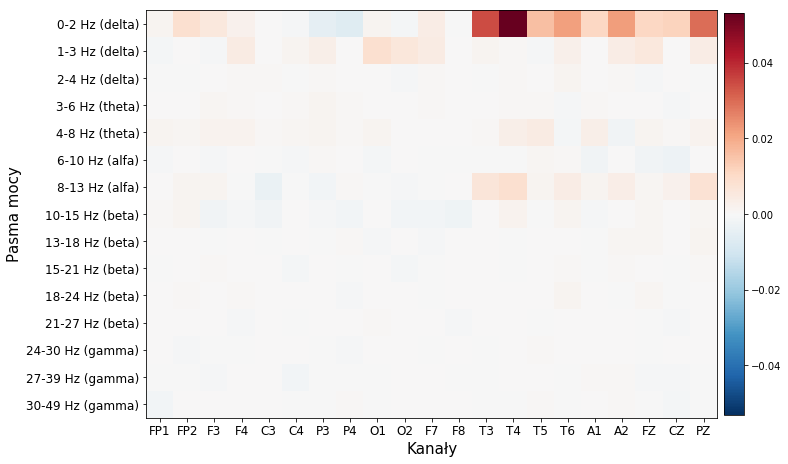

0.011565862101095918
svc_trad


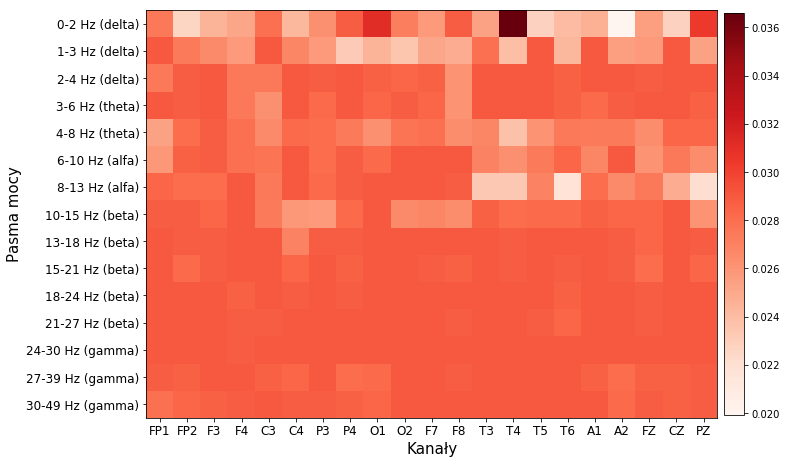

In [15]:
folder = 'results'
for f in os.listdir(folder):
    if '.npy' in f:
        X = np.load(folder + "/" + f)
        name = f.replace('.npy', '')
        print(np.max(np.std(X, axis=1)))
        X = np.mean(X, axis=1)

        X = make_matrix(X[np.newaxis])[0, 0]
        plot_matrix(X, name)